# Using Cross-Validation

Here, we'll go through how to use cross-validation for your models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

# To create test/train splits
from sklearn.model_selection import train_test_split
# To help us go through different parameter configurations for
# each type of model.
from sklearn.model_selection import GridSearchCV
# To help us evaluate the model on each trial or "split"
from sklearn.model_selection import cross_val_score

# Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
# Neural Networks
from sklearn.neural_network import MLPClassifier

# Confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
# This is to stop the barrage of warning messages we'll get later
import warnings; warnings.simplefilter('ignore')

In [3]:
# Create a seed to use later.
seed = 42

In [4]:
# First import your dataset as usual
dataset = "datasets/people.csv"

df = pd.read_csv(dataset)

df.head()

,Height,Weight,Age,Gender
0,151.765,47.825606,63.0,male
1,139.700,36.485807,63.0,female
2,136.525,31.864838,65.0,female
3,156.845,53.041915,41.0,male
4,145.415,41.276872,51.0,female


In [5]:
df.describe()

,Height,Weight,Age
count,543.000000,543.000000,543.000000
mean,138.391927,35.661424,29.398435
std,27.464983,14.684929,20.727660
min,53.975000,4.252425,0.000000
25%,125.247400,22.189154,12.000000
50%,148.590000,40.086193,27.000000
75%,157.480000,47.216092,43.000000
max,179.070000,62.992589,88.000000


In [6]:
# Let's see how big our dataset is
n_samples, n_columns = df.shape
print("Number of samples: {}".format(n_samples))

Number of samples: 543


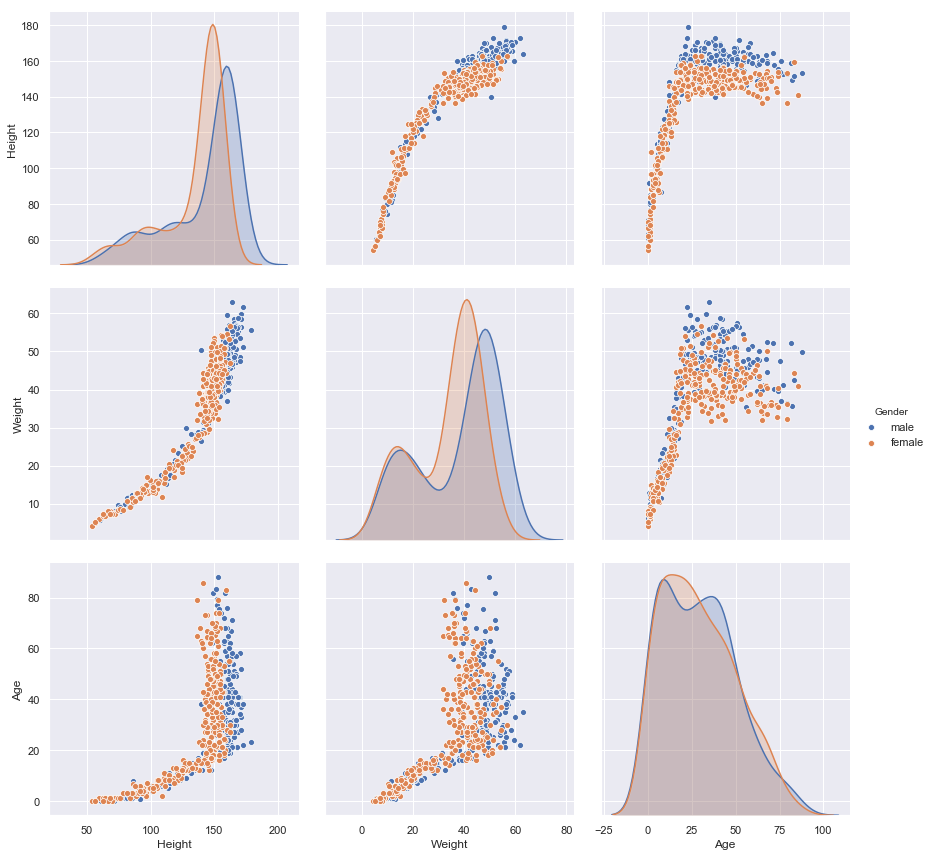

In [7]:
# Step 1: Create visualization
sns.pairplot(df, hue="Gender", height=4)

In [8]:
# Step 2: Separate features and labels
df_X = df.drop("Gender", axis=1)
df_X.head()

,Height,Weight,Age
0,151.765,47.825606,63.0
1,139.700,36.485807,63.0
2,136.525,31.864838,65.0
3,156.845,53.041915,41.0
4,145.415,41.276872,51.0


In [9]:
df_y = df["Gender"]
df_y.head()

0      male
1    female
2    female
3      male
4    female
Name: Gender, dtype: object

In [10]:
# Step 3: Split into test, train
# We want 70% train, 30% test
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y,
                                                    test_size=0.3,
                                                    random_state=seed)

## Step 4: Train Estimators

To demonstrate how to do crossfold-validation (CV), we'll use two algorithms:
- [Neural Network](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


Here's what we'll be doing:
- Defining a "grid" of possibilities for the models' parameters
- Training on "splits" of our data
- Keeping the best model of each type (KNN, NN) that performed best on our dataset
- Showing the accuracies and confusion matrices of those best-performing models

__JUPYTER PRO-TIP__: You can time the run-time of individual cells in Jupyter by putting `%%time` at the start of any cell.

In [ ]:
%%time
# We're going to build nn_params, a list of dictionaries
# Each dictionary has the variable name to try modifying, and
# which values to try for it.
# All combinations of variables in the dictionary below will be tried

nn_params = [
    {
        "hidden_layer_sizes": [
            (50,), (100,), # models with 1 hidden layer
            (50,50), (100,100), # models with 2 hidden layers
        ],
        "max_iter": [100, 200, 500],
        "activation": ["logistic", "tanh", "relu"],
        "learning_rate_init": [1e-5, 1e-4, 1e-3],
    },
    {
        "max_iter": [100, 200],
        "activation": ["tanh"],
        "learning_rate_init": [1e-5, 1e-4],
    }
]

# nn_tester will test the permutations of parameters in nn_params
# using 5 trials (splitting train set into 5, training on 4 and testing
# on the 5th).
nn_model = MLPClassifier(random_state=seed)
nn_experimenter = GridSearchCV(nn_model, nn_params, cv=5)
nn_experimenter.fit(train_X, train_y)

print("Best parameter set found: ")
print(nn_experimenter.best_params_)

In [12]:
means = nn_experimenter.cv_results_['mean_test_score']
param_configurations = nn_experimenter.cv_results_['params']

for mean, params_configuration in zip(means, param_configurations):
    print("Avg accuracy: {}\tModel: {}".format(mean, params_configuration))


Avg accuracy: 0.4842105263157895	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 1e-05, 'max_iter': 100}
Avg accuracy: 0.4842105263157895	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 1e-05, 'max_iter': 200}
Avg accuracy: 0.4842105263157895	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 1e-05, 'max_iter': 500}
Avg accuracy: 0.5473684210526316	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0001, 'max_iter': 100}
Avg accuracy: 0.5473684210526316	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0001, 'max_iter': 200}
Avg accuracy: 0.5473684210526316	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0001, 'max_iter': 500}
Avg accuracy: 0.5815789473684211	Model: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}
Avg

In [13]:
train_acc = nn_experimenter.score(train_X, train_y)
test_acc = nn_experimenter.score(test_X, test_y)

print("Train accuracy: {:.1f}%".format(train_acc*100))
print("Test accuracy: {:.1f}%".format(test_acc*100))

Train accuracy: 60.3%
Test accuracy: 58.9%


Text(89.18,0.5,'Actual label')

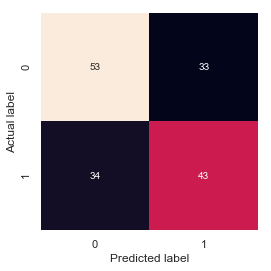

In [14]:
# Create confusion matrix
nn_best_preds = nn_experimenter.predict(test_X)
nn_conf_mat = confusion_matrix(test_y, nn_best_preds)

sns.heatmap(nn_conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
%%time

# Now we can do the same thing with KNN

# Notice here how we decide we only want one dictionary of params
# to try all permutations of.
knn_params = [
    {
        "n_neighbors": [2, 3, 4, 5, 10, 12, 15],
        "p": [1, 2],
        "algorithm": ["ball_tree", "kd_tree"]
    },
]

knn_model = KNeighborsClassifier()
knn_exp = GridSearchCV(knn_model, knn_params, cv=5)

knn_exp.fit(train_X, train_y)

print("Best parameter set found: ")
print(knn_exp.best_params_)

In [16]:
means = knn_exp.cv_results_['mean_test_score']
param_configurations = knn_exp.cv_results_['params']

for mean, params_configuration in zip(means, param_configurations):
    print("Avg accuracy: {}\tModel: {}".format(mean, params_configuration))


Avg accuracy: 0.7131578947368421	Model: {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1}
Avg accuracy: 0.7052631578947368	Model: {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2}
Avg accuracy: 0.718421052631579	Model: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
Avg accuracy: 0.7473684210526316	Model: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}
Avg accuracy: 0.7289473684210527	Model: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1}
Avg accuracy: 0.7631578947368421	Model: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2}
Avg accuracy: 0.7131578947368421	Model: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1}
Avg accuracy: 0.7210526315789474	Model: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2}
Avg accuracy: 0.7447368421052631	Model: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
Avg accuracy: 0.7578947368421053	Model: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 2}
Avg accuracy: 0.75	Model: {'algorithm': 'ball_tree', 'n_neighbors': 1

In [17]:
train_acc = knn_exp.score(train_X, train_y)
test_acc = knn_exp.score(test_X, test_y)

print("Train accuracy: {:.1f}%".format(train_acc*100))
print("Test accuracy: {:.1f}%".format(test_acc*100))

Train accuracy: 81.6%
Test accuracy: 78.5%


Text(89.18,0.5,'Actual label')

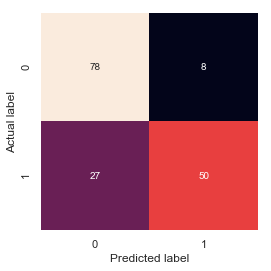

In [18]:
# Create confusion matrix
knn_best_preds = knn_exp.predict(test_X)
knn_conf_mat = confusion_matrix(test_y, knn_best_preds)

sns.heatmap(knn_conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')